# load_wine 와인데이터 분류

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## 데이터 준비, 이해하기

In [2]:
wine = load_wine()

In [3]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [4]:
wine.data.shape

(178, 13)

In [5]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [6]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [7]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [8]:
X = wine.data
Y = wine.target

* 데이터 분포 확인

(array([59.,  0.,  0.,  0.,  0., 71.,  0.,  0.,  0., 48.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

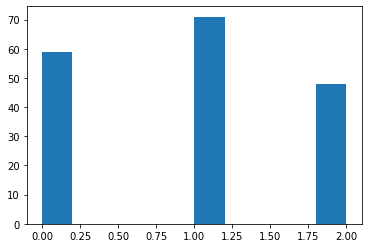

In [9]:
import matplotlib.pyplot as plt
plt.hist(wine.target)

In [10]:
# Y.value_counts() >>series

In [11]:
wine.feature_names, wine.data.shape

(['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'],
 (178, 13))

In [12]:
wine.data[1]

array([1.32e+01, 1.78e+00, 2.14e+00, 1.12e+01, 1.00e+02, 2.65e+00,
       2.76e+00, 2.60e-01, 1.28e+00, 4.38e+00, 1.05e+00, 3.40e+00,
       1.05e+03])

In [13]:
import pandas as pd
data1 = pd.DataFrame(data = wine.data, columns = wine.feature_names)

In [14]:
data1['label'] = wine.target

In [15]:
data1.label.value_counts()  # sorted??

1    71
0    59
2    48
Name: label, dtype: int64

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,
                                                    test_size = 0.2, random_state = 21)

In [17]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape # 한번에 확인방법?

((142, 13), (36, 13), (142,), (36,))

* Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
wine_tree = DecisionTreeClassifier()

In [20]:
wine_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [21]:
wine_pre1 = wine_tree.predict(x_test)

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
print(confusion_matrix(y_test, wine_pre1))

[[15  0  0]
 [ 1  8  1]
 [ 1  2  8]]


In [24]:
print(classification_report(y_test, wine_pre1))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       0.80      0.80      0.80        10
           2       0.89      0.73      0.80        11

    accuracy                           0.86        36
   macro avg       0.86      0.84      0.85        36
weighted avg       0.86      0.86      0.86        36



In [25]:
# 예측은 떨어지지만?  class1의 실제 분류성공이 100%?, class1이 좀더 많긴 함
#        T predict    F predict
# True                         recall
# False
#          precision

* Random_Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
wine_ran = RandomForestClassifier() #shift tab으로 hyper parameter튜닝

In [28]:
wine_ran.fit(x_train, y_train)

RandomForestClassifier()

In [29]:
wine_pre2 = wine_ran.predict(x_test)

In [30]:
print(classification_report(y_test, wine_pre2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [31]:
# 오히려 전부 1이라 신뢰할수 없음..

* SVM

In [32]:
from sklearn import svm

In [33]:
wine_svm = svm.SVC()

In [34]:
wine_svm.fit(x_train, y_train)

SVC()

In [35]:
wine_pre3 = wine_svm.predict(x_test)

In [36]:
print(classification_report(y_test, wine_pre3))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.45      1.00      0.62        10
           2       0.00      0.00      0.00        11

    accuracy                           0.61        36
   macro avg       0.44      0.60      0.48        36
weighted avg       0.48      0.61      0.52        36



/home/jin/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
# SVM은 분류 정확도가 매우 낮게 나와버림

* SGD Classifier

In [38]:
from sklearn.linear_model import SGDClassifier

In [39]:
wine_sgd = SGDClassifier()

In [40]:
wine_sgd.fit(x_train, y_train)

SGDClassifier()

In [41]:
wine_pre4 = wine_sgd.predict(x_test)

In [42]:
print(classification_report(y_test, wine_pre4))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       0.50      1.00      0.67        10
           2       0.00      0.00      0.00        11

    accuracy                           0.64        36
   macro avg       0.44      0.62      0.50        36
weighted avg       0.48      0.64      0.53        36



/home/jin/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
wine_logi = LogisticRegression()

In [45]:
wine_logi.fit(x_train, y_train)

/home/jin/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [46]:
# jupyter notebook --NotebookApp.max_buffer_size=your_value >>memory up

In [47]:
wine_pre5 = wine_logi.predict(x_test)

In [48]:
print(classification_report(y_test, wine_pre5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [49]:
# wine분류 모델들의 신뢰도가 너무 낮거나 너무 높아서 오히려 신뢰가 힘듬

# load_breast_cancer

In [50]:
from sklearn.datasets import load_breast_cancer

In [51]:
cancer = load_breast_cancer()

In [52]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [53]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [54]:
cancer.data.shape, cancer.feature_names.shape, cancer.target.shape

((569, 30), (30,), (569,))

In [55]:
X = cancer.data
Y = cancer.target

In [56]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 20)

In [57]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [58]:
# target_name (악성, 양성)
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [59]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [61]:
cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [62]:
#data describe
import pandas as pd
des = pd.DataFrame(X, columns=cancer.feature_names)

In [63]:
des.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
type(cancer.data), cancer.data.dtype

In [ ]:
cancer.data.describe()